In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(42)

# K-means method

In [17]:
class K_means():
  def __init__(self,k):
    # Số nhóm
    self.n=k

  def init_centroids(self,X):
    # Chọn 3 dòng bất kì trong X
    return X[np.random.choice(X.shape[0],self.n,replace=False)]

  def assign_labels(self,X,centroids):
    # Tính khoản cách mỗi điểm trong X đến 3 điểm trung tâm
    distance=cdist(X,centroids)
    # Trả về mảng chứa chỉ số của khoảng cách gần nhất mỗi dòng
    return np.argmin(distance,axis=1)

  def update_centroids(self,X,labels):
    # Khởi tạo mảng centroids 0 có kích thước (n,d) với d là số chiều của dữ liệu
    centroids=np.zeros((self.n,X.shape[1]))
    # Với mỗi vòng lặp, tính trung bình của nhóm thứ i và tính centroids của nhóm đó
    for i in range(self.n):
      Xi=X[labels==i,:]
      centroids[i,:]=np.mean(Xi,axis=0)
    return centroids

  def has_converged(self,centroids,new_centroids):
    return (set([tuple(a) for a in centroids])==set([tuple(a) for a in new_centroids]))

  def fit(self,X):
    # centroids là 1 mảng chứa centroid của các lần lặp
    centroids=[self.init_centroids(X)]
    labels=[]
    it=0
    while True:
      labels.append(self.assign_labels(X,centroids[-1]))
      new_centroids=self.update_centroids(X,labels[-1])
      if self.has_converged(centroids[-1],new_centroids):
        break
      centroids.append(new_centroids)
      it+=1
    return (centroids,labels,it)



# Visualize function



In [18]:
def visualize_kmeans(X,label):
  X0=X[label==0,:]
  X1=X[label==1,:]
  X2=X[label==2,:]
  plt.plot(X0[:,0],X0[:,1],'bo',markersize=2)
  plt.plot(X1[:,0],X1[:,1],'r^',markersize=2)
  plt.plot(X2[:,0],X2[:,1],'gs',markersize=2)
  plt.axis('equal')
  plt.show()


# Assignment 1 (4 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.*italicized text*

In [19]:
#Tạo toy dataset
cov=[[1,0],[0,1]]
centroids=[[2,2],[8,3],[3,6]]
N=200
X0=np.random.multivariate_normal(centroids[0],cov,N)
X1=np.random.multivariate_normal(centroids[1],cov,N)
X2=np.random.multivariate_normal(centroids[2],cov,N)
X=np.concatenate((X0,X1,X2),axis=0)
#Số nhóm
k=3
labels=np.array([0]*N+[1]*N+[2]*N)

Visualize Data với labels ban đầu

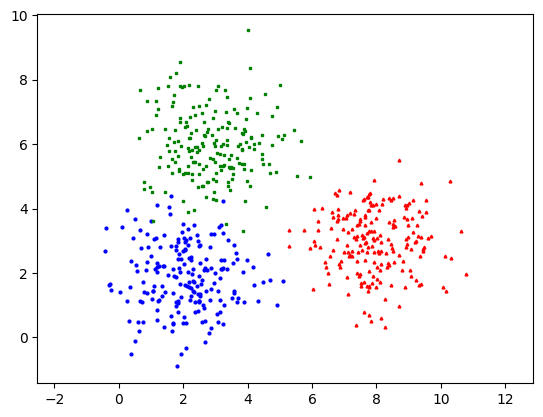

In [20]:
visualize_kmeans(X,labels)

In [23]:
model=K_means(k)
(centroids,labels,it)=model.fit(X)
print(f'Số vòng lặp : {it}')
print("Các centroids tìm được \n " ,centroids[-1])

Số vòng lặp : 4
Các centroids tìm được 
  [[2.08277353 1.89751868]
 [2.88562749 6.02627809]
 [7.92776737 2.98587759]]


Visualize Data với labels khi áp dụng k-means

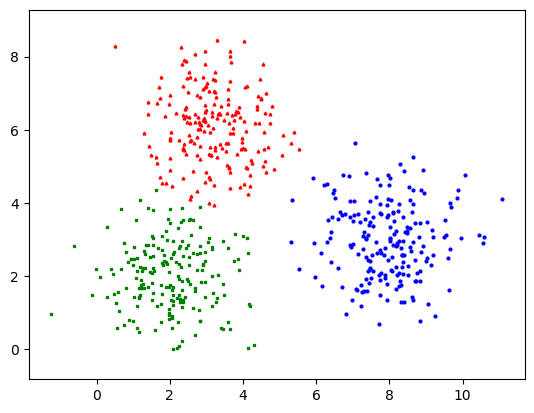

In [6]:
visualize_kmeans(X,labels[-1])

# Nhận xét:
- Dữ liệu được phân vào các cluster với độ chính xác khá cao
- K-means hoạt động tốt trên các cluster có dạng hình tròn
- Các centroids không quá sai lệch với các centroid định nghĩa


# Assignment 2 (4 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

In [27]:
#tạo dữ liệu theo yêu cầu
X3=np.random.multivariate_normal([2,2],cov,50)
X4=np.random.multivariate_normal([8,3],cov,20)
X5=np.random.multivariate_normal([3,6],cov,1000)

X_1=np.concatenate((X3,X4,X5),axis=0)
k=3
labels_2=np.array([0]*50+[1]*20+[2]*1000)


Visualize Data với labels ban đầu

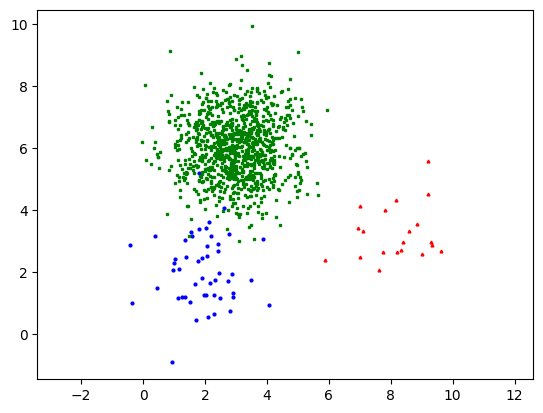

In [25]:
visualize_kmeans(X_1,labels_2)

In [28]:
(centroids,labels,it)=model.fit(X)
print(f'Số vòng lặp : {it}')
print("Các centroids tìm được \n " ,centroids[-1])

Số vòng lặp : 8
Các centroids tìm được 
  [[2.42708072 3.95208237]
 [7.0013324  2.69843817]
 [8.69733464 3.27114228]]


Visualize Data với labels khi áp dụng k-means

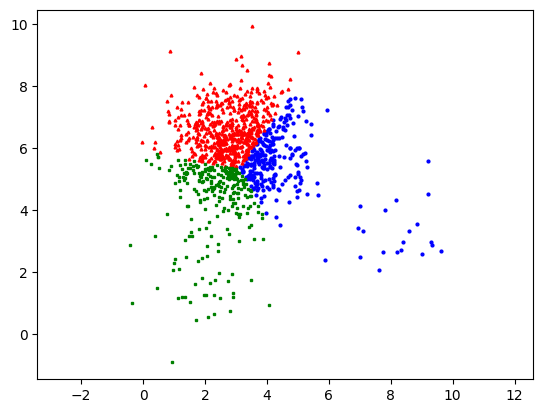

In [12]:
visualize_kmeans(X_1,labels[-1])

# Nhận xét
- Ta có thể thấy rằng K-means chạy khá tệ nếu số lượng điểm dữ liệu trong các cluster chênh lệch nhau quá nhiều
- Đây cũng là một hạn chế của K-means khi yêu cầu các cluster cần có số lượng điểm gần bằng nhau


# Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where

$$
    \Sigma_1 =
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$

and

$$
\Sigma_2 =
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [13]:
#tạo dữ liệu theo yêu cầu
cov2=[[10,0],[0,1]]
X6=np.random.multivariate_normal([2,2],cov,200)
X7=np.random.multivariate_normal([8,3],cov,200)
X8=np.random.multivariate_normal([3,6],cov2,200)
X_2=np.concatenate((X6,X7,X8),axis=0)
k=3
labels_3=np.array([0]*200+[1]*200+[2]*200)

Visualize Data với label đúng

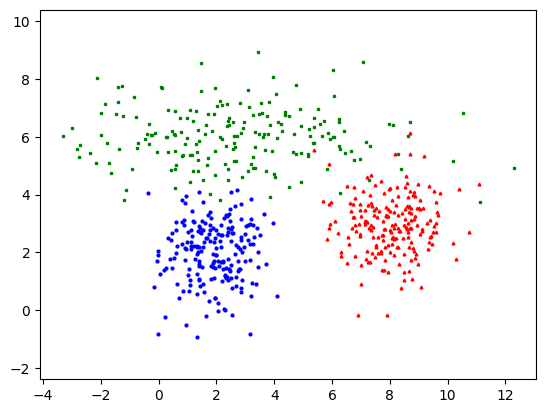

In [16]:
visualize_kmeans(X_2,labels_3)

In [29]:
(centroids,labels,it)=model.fit(X_2)
print(f'Số vòng lặp : {it}')
print("Các centroids tìm được \n " ,centroids[-1])

Số vòng lặp : 7
Các centroids tìm được 
  [[1.88804388 1.98075379]
 [1.71219391 6.03536253]
 [7.8666609  3.4148568 ]]


Visualize Data với labels khi áp dụng k-means

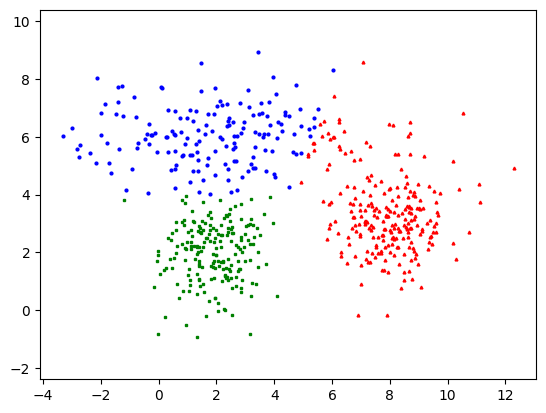

In [15]:
visualize_kmeans(X_2)

# Nhận xét
- Ta thấy K-means làm khá tệ đối với cluster với ma trận hiệp phương sai có các điểm trên đường chéo khác nhau ( có các điểm dữ liệu trải dài )
- K-means làm khá tốt với 2 cluster tuân theo phân phối chuẩn và ma trận hiệp phương sai là ma trận đường chéo có các điểm trên đường chéo giống nhau
- Từ đây, ta có thể thấy thêm 1 hạn chế của K-means clustering là các cluster cần có đạng hình tròn